In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
#Base de dados
carros = pd.read_csv('https://raw.githubusercontent.com/RafaelSilvax06/ProjetoIA-Analise/refs/heads/main/car_sales_data.csv')
carros.head(30)
-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [38]:
#Traduzindo colunas
carros.columns = ['Fabricante', 'Modelo', 'Potencia Motor', 'Tipo Combustivel', 'Ano De Fabricação', 'Quilometragem', 'Preco']

#Convertando preço dos carros para reais.
carros['Preco'] = carros['Preco'].astype(float)
carros['Preco'] = carros['Preco'] * 5.38
carros.head()


,Fabricante,Modelo,Potencia Motor,Tipo Combustivel,Ano De Fabricação,Quilometragem,Preco
0,Ford,Fiesta,1.0,Petrol,2002,127300.0,8.897509e+04
1,Porsche,718 Cayman,4.0,Petrol,2016,57850.0,1.438652e+06
2,Ford,Mondeo,1.6,Diesel,2014,39190.0,6.967496e+05
3,Toyota,RAV4,1.8,Hybrid,1988,210814.0,4.935020e+04
4,VW,Polo,1.0,Petrol,2006,127869.0,1.187010e+05


In [26]:
#Limpeza dos dados
print('===== ANÁLISE INICIAL DA BASE DE DADOS =====\n')

# Informações gerais sobre o DataFrame
print('Informações gerais:')
print('------------------------------------------------')
carros.info()
print('\n')

# Verificação de valores nulos
print('Verificando se existem dados nulos:')
print('------------------------------------------------')
print(carros.isnull().sum())
print('\n')

# Estatísticas descritivas
print('Descrição dos dados numéricos (verificar se há algo fora do padrão):')
print('------------------------------------------------')
print(carros.describe())
print('\n')

print('===== FIM DA ANÁLISE INICIAL =====')


===== ANÁLISE INICIAL DA BASE DE DADOS =====

Informações gerais:
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fabricante         50000 non-null  object 
 1   Modelo             50000 non-null  object 
 2   Potencia Motor     50000 non-null  float64
 3   Tipo Combustivel   50000 non-null  object 
 4   Ano De Fabricação  50000 non-null  int64  
 5   Quilometragem      50000 non-null  int64  
 6   Preco              50000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.7+ MB


Verificando se existem dados nulos:
------------------------------------------------
Fabricante           0
Modelo               0
Potencia Motor       0
Tipo Combustivel     0
Ano De Fabricação    0
Quilometragem        0
Preco                0
dtype: int64


Descrição dos dados 

In [27]:
'''Analisando o bloco percebemos que existem carros com valores muitos irreais, decidimos remover os carros com valor de R$ 3.500,00'''
carros_valor_irreais = carros[carros['Preco'] <= 3500.00].sort_values(by='Preco')
carros.drop(index=carros_valor_irreais.index, inplace=True)
carros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48711 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fabricante         48711 non-null  object 
 1   Modelo             48711 non-null  object 
 2   Potencia Motor     48711 non-null  float64
 3   Tipo Combustivel   48711 non-null  object 
 4   Ano De Fabricação  48711 non-null  int64  
 5   Quilometragem      48711 non-null  int64  
 6   Preco              48711 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB


In [28]:
# Transformando quilometragem em float
carros['Quilometragem'] = carros['Quilometragem'].astype(float)
carros.head()

,Fabricante,Modelo,Potencia Motor,Tipo Combustivel,Ano De Fabricação,Quilometragem,Preco
0,Ford,Fiesta,1.0,Petrol,2002,127300.0,16538.12
1,Porsche,718 Cayman,4.0,Petrol,2016,57850.0,267407.52
2,Ford,Mondeo,1.6,Diesel,2014,39190.0,129507.36
3,Toyota,RAV4,1.8,Hybrid,1988,210814.0,9172.90
4,VW,Polo,1.0,Petrol,2006,127869.0,22063.38


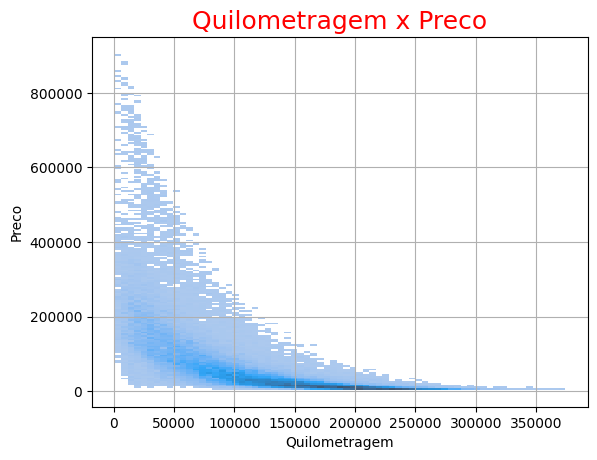

Entendemos que quanto menos quilometragem maior o preço será do carro.


In [34]:
#Analisando preço por quilometragem
sns.histplot(x='Quilometragem', y='Preco', data=carros)
plt.title('Quilometragem x Preco', fontsize = 18, color = 'red')
plt.grid()
plt.show()
print('Entendemos que quanto menos quilometragem maior o preço será do carro.')

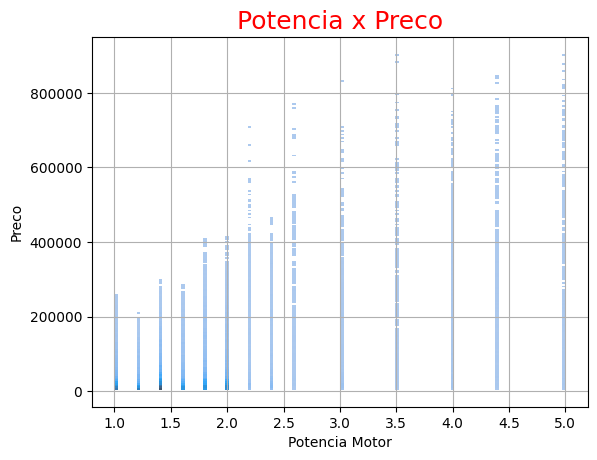

In [37]:
#Analisando preço por potencia.
sns.histplot(x='Potencia Motor', y='Preco', data=carros)
plt.title('Potencia x Preco', fontsize = 18, color = 'red')
plt.grid()
plt.show()